<a href="https://colab.research.google.com/github/bartolomeoadrian/computational-vision/blob/main/03_convolution_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [12]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# Lectura y Despliegue de Imagen

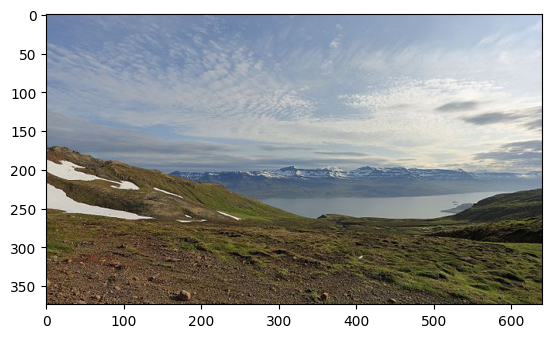

In [3]:
image_url = 'https://raw.githubusercontent.com/bartolomeoadrian/computational-vision/refs/heads/main/assets/images/landscape.jpg'

# Download the image
response = requests.get(image_url)
with open('landscape.jpg', 'wb') as f:
    f.write(response.content)

# Read the image using cv2.imread
img = cv2.imread('landscape.jpg')

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

# Canny

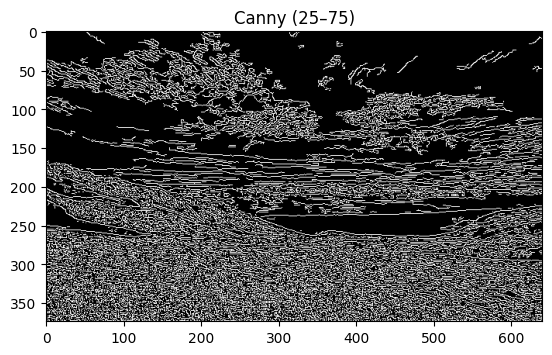

In [17]:
edges_canny = cv2.Canny(img_rgb, 25, 75)

plt.imshow(edges_canny, cmap='gray')
plt.title("Canny (25–75)")
plt.show()

# Canny + Suavizado Gauss

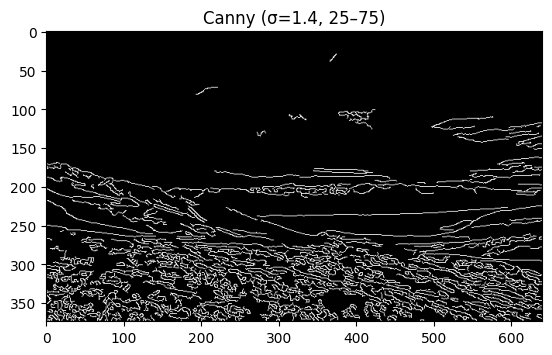

In [41]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (0, 0), sigmaX=1.4)

low_thresh, high_thresh = 25, 75
edges = cv2.Canny(blur, low_thresh, high_thresh)

plt.imshow(edges, cmap='gray')
plt.title("Canny (σ=1.4, 25–75)")
plt.show()

# Laplacian-of-Gaussian (LoG) / Fusion OR

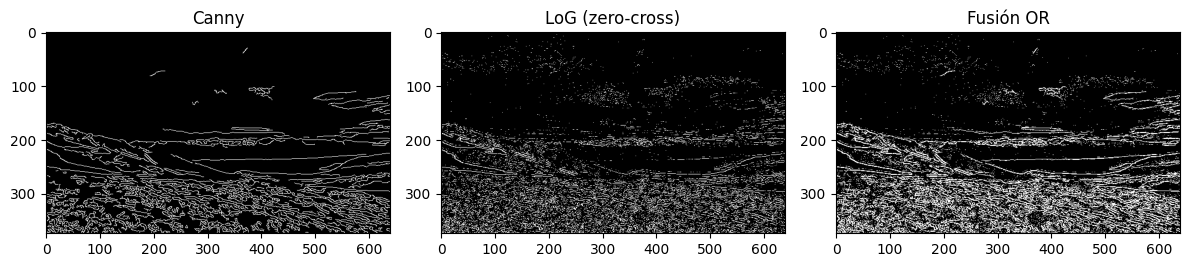

In [43]:
gray = cv2.imread("landscape.jpg", cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(gray, (0,0), 1.4)
lap = cv2.Laplacian(blur, cv2.CV_32F, ksize=3)

# Zero-crossings
sign  = np.sign(lap)
sign[sign == 0] = 1

# Masks
zc  = np.zeros_like(sign, dtype=bool)
zc[1: , :]  |= (sign[1: , :] * sign[:-1, :]  < 0)
zc[: , 1:] |= (sign[: , 1:] * sign[: , :-1] < 0)
zc[1: , 1:] |= (sign[1: , 1:] * sign[:-1, :-1] < 0)
zc[1: , :-1] |= (sign[1: , :-1] * sign[:-1, 1:] < 0)

amp_thr = 10.0
edges_log = (zc & (np.abs(lap) > amp_thr)).astype(np.uint8) * 255

# Canny & Fusion OR
edges_canny = cv2.Canny(blur, 25, 75)
edges_fused = cv2.bitwise_or(edges_canny, edges_log)

# Preview
titles = ["Canny", "LoG (zero-cross)", "Fusión OR"]
imgs   = [edges_canny, edges_log, edges_fused]

plt.figure(figsize=(12,4))

for i,(t,img) in enumerate(zip(titles, imgs)):
    plt.subplot(1,3,i+1);
    plt.imshow(img, cmap='gray');
    plt.title(t);

plt.tight_layout();
plt.show()